In [1]:
import sys
import os

dir = os.getcwd()

# Loop to move up the directory tree until we find FinModels
while os.path.basename(dir) != 'FinModels':
    dir = os.path.dirname(dir)  # Move up one level

print(dir)

sys.path.append(dir)
# Doda dostop tudi do drugih modelov

c:\Users\lavse\Desktop\FMF\FinModels


In [2]:
from Stock_Generation.StocksGeneration import generate_n_stock_data
from PrepareData import prepare_data
from FitNormalDistribution import fit_normal_distribution
import ShrinkageMethods
from ModelCore import*
from Visualise import*

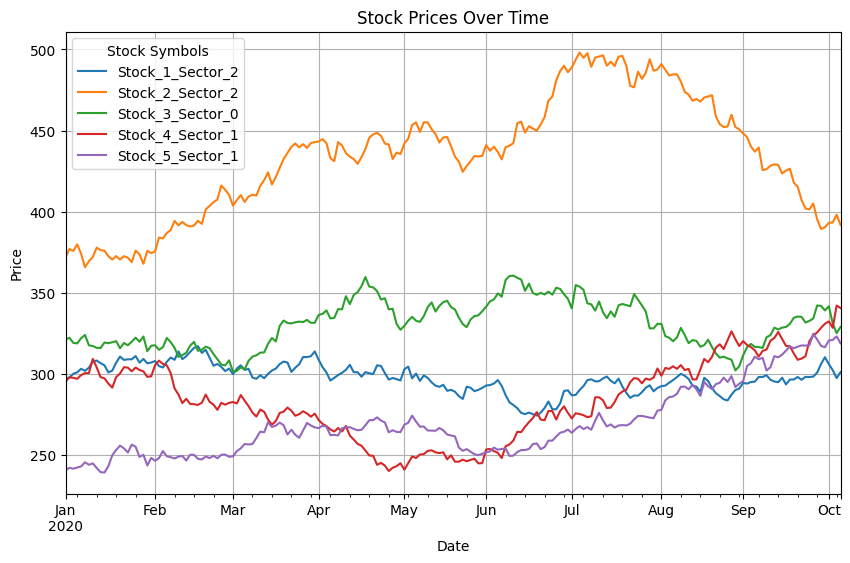

In [3]:
df_prices = generate_n_stock_data(n_stocks=5, n_days=200, random_seed=0)

visualize_generated_stocks(df_prices=df_prices)

In [4]:
df_weekly_log_returns, df_weekly_prices = prepare_data(df_prices=df_prices)

m, S = fit_normal_distribution(df_weekly_log_returns, df_weekly_prices)

m_js_shr, S_js = ShrinkageMethods.james_stein_estimator(df_weekly_log_returns, df_weekly_prices)

m_shr, S_shr = ShrinkageMethods.shrinkage_metod(df_weekly_log_returns, df_weekly_prices)

c:\Users\lavse\Desktop\FMF\FinModels\Markowitz\ModelCore.py:47: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_result = pd.concat([df_result, row.to_frame().T], ignore_index=True)
c:\Users\lavse\Desktop\FMF\FinModels\Markowitz\ModelCore.py:47: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_result = pd.concat([df_result, row.to_frame().T], ignore_index=True)
c:\Users\lavse\Desktop\FMF\FinModels\Markowitz\ModelCore.py:47: FutureWarning: The behavior of DataFrame concatenation with empty or all

without shrinkage
       delta       obj    return      risk  weight_0  weight_1  weight_2  \
0  31.622777 -2.863685  0.096138  0.305938  0.404386  0.163472  0.220606   
1  23.357215 -2.089493  0.100381  0.306196  0.396501  0.163303  0.217551   
2  17.252105 -1.516348  0.106167  0.306671  0.385751  0.163072  0.213386   
3  12.742750 -1.091221  0.114103  0.307553  0.371004  0.162757  0.207672   
4   9.412050 -0.774742  0.125117  0.309204  0.350531  0.162324  0.199745   

   weight_3  weight_4  
0  0.129675  0.081861  
1  0.131802  0.090843  
2  0.134701  0.103090  
3  0.138679  0.119889  
4  0.144200  0.143200  
with J-S shrinkage
       delta       obj    return      risk  weight_0  weight_1  weight_2  \
0  31.622777 -2.892265  0.117815  0.308524  0.385606  0.162161  0.214096   
1  23.357215 -2.105191  0.120101  0.308662  0.379665  0.161905  0.211735   
2  17.252105 -1.523139  0.123208  0.308915  0.371590  0.161558  0.208526   
3  12.742750 -1.092264  0.127443  0.309383  0.360585  0.16

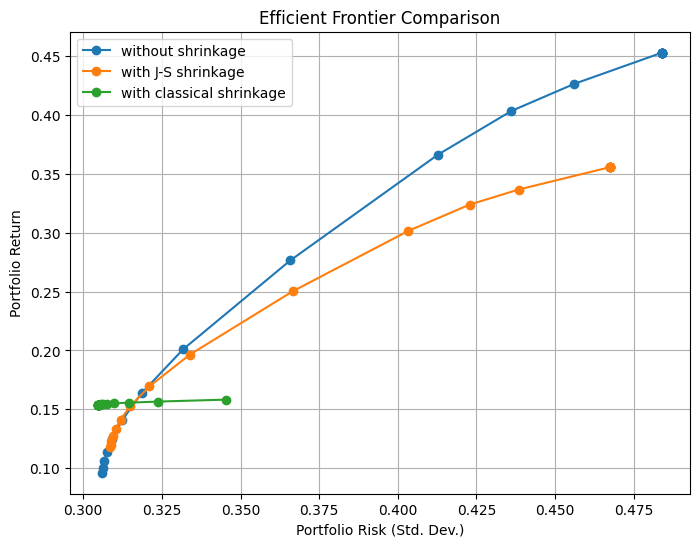

In [5]:
deltas = np.logspace(start=-1, stop=1.5, num=20)[::-1]

df_without_shrinkage = model_2_13(m, S, deltas)
df_james_stein_with_shrinkage = model_2_13(m_js_shr, S_js, deltas)
df_normal_shrinkage = model_2_13(m_shr, S_shr, deltas)


models = [[df_without_shrinkage, "without shrinkage"],
          [df_james_stein_with_shrinkage, "with J-S shrinkage"],
          [df_normal_shrinkage, "with classical shrinkage"]]

display_results(models)
    